In [1]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv("/content/aps_data.csv")

<ipython-input-3-7b43c2ae474f>:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("/content/aps_data.csv")


In [4]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [5]:
np.nan

nan

In [6]:
dataset=dataset.replace("na",np.nan)

In [7]:
pd.options.display.max_rows=100

In [8]:
dataset.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [9]:
dataset.isnull().sum().sum()

71649

In [10]:
pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [11]:
[feature for feature in dataset.columns if feature not in ['class']]

['aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 'ce_000',
 

In [12]:
### Filling null values in feature with median of that feature
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
    dataset[feature]=dataset[feature].fillna(dataset[feature].median())

In [13]:
dataset.isnull().sum().sum()

0

In [14]:
pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Count"})

,Null Value Count
class,0
cs_003,0
cn_009,0
co_000,0
cp_000,0
...,...
ba_005,0
ba_006,0
ba_007,0
ba_008,0


In [15]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [16]:
X=dataset.drop("class",axis=1)

In [17]:
y=dataset["class"]

In [18]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [19]:
y=pd.get_dummies(y,drop_first=True)

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [24]:
classifier=Sequential()

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim =170))

classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
 
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [25]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=20,validation_split=0.25)

Epoch 1/20
300/300 [==============================] - 4s 6ms/step - loss: 0.1393 - accuracy: 0.9767 - val_loss: 0.0892 - val_accuracy: 0.9760
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0667 - val_accuracy: 0.9830
Epoch 3/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0355 - accuracy: 0.9877 - val_loss: 0.0622 - val_accuracy: 0.9810
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9910 - val_loss: 0.0669 - val_accuracy: 0.9800
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 6/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9933 - val_loss: 0.0577 - val_accuracy: 0.9850
Epoch 7/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0644 - val_accuracy: 0.9860
Epoch 

In [28]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


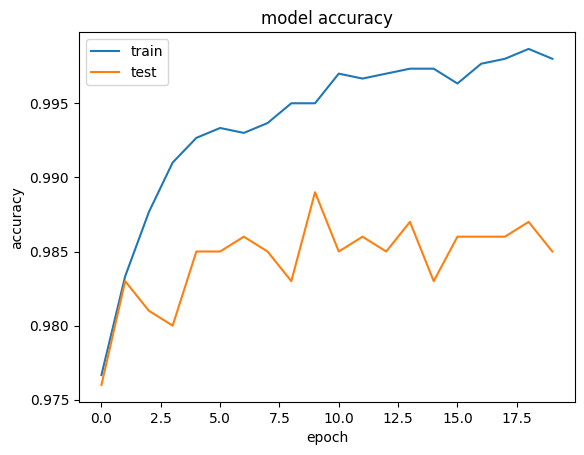

In [29]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

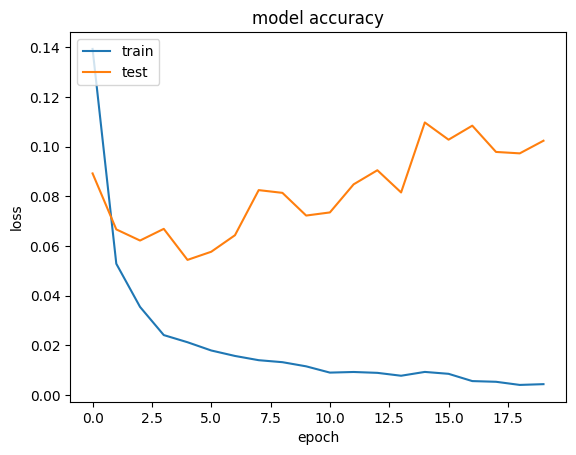

In [30]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred=classifier.predict(X_test)

32/32 [==============================] - 1s 7ms/step


In [32]:
#for sigmoid threshold is 0.5
y_pred=y_pred>0.5


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
y_test.shape

(1000, 1)

In [35]:
y_pred.shape

(1000, 1)

In [36]:
confusion_matrix(y_test,y_pred)

array([[979,   7],
       [  4,  10]])

In [39]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model/%Y/%m/%d/H/%M/%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [40]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model/2023/04/09/H/21/24_.h5


In [41]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 5.2 MB/s eta 0:00:00


In [42]:
from kerastuner.tuners import RandomSearch

<ipython-input-42-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [43]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [44]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

In [45]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 06s]
val_accuracy: 0.9860000014305115

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 00m 21s


In [46]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [47]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [48]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [49]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [50]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [51]:
tuner_second.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.9900000095367432

Best val_accuracy So Far: 0.9900000095367432
Total elapsed time: 00h 01m 12s


In [52]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units_0': 224,
 'units_1': 64,
 'learning_rate': 0.001,
 'units_2': 160,
 'units_3': 192,
 'units_4': 288,
 'units_5': 480,
 'units_6': 288,
 'units_7': 320,
 'units_8': 160,
 'units_9': 64,
 'units_10': 256,
 'units_11': 448,
 'units_12': 448,
 'units_13': 32,
 'units_14': 128,
 'units_15': 192}

In [59]:
classifier2=tuner_second.get_best_models(num_models=1)[0]